Correlation between ice cream sales and shark attacks: 0.801

Naive regression (shark_attacks ~ ice_sales):
                            OLS Regression Results                            
Dep. Variable:          shark_attacks   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     534.0
Date:                Fri, 27 Jun 2025   Prob (F-statistic):           2.09e-68
Time:                        19:15:10   Log-Likelihood:                -637.45
No. Observations:                 300   AIC:                             1279.
Df Residuals:                     298   BIC:                             1286.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

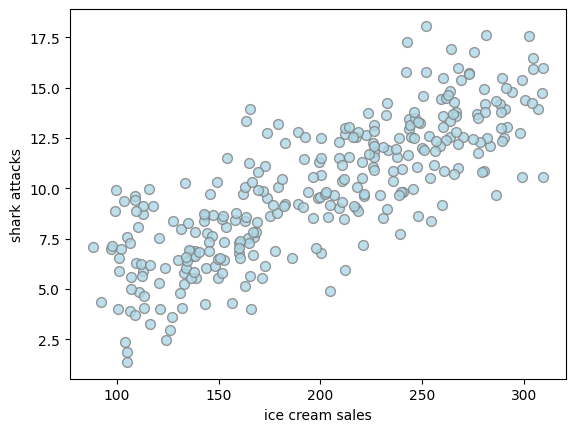

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from plot_style import line_params, scatter_params

# Set seed for reproducibility
np.random.seed(42)

# Simulate data
n = 300
# Confounder: Temperature
temp = np.random.uniform(10, 30, size=n)  # Temperature in degrees Celsius
# Ice cream sales depend on temperature
ice_sales = 10 * temp + np.random.normal(0, 10, size=n)
# Shark attacks depend on temperature but not on ice cream sales directly
shark_attacks = 0.5 * temp + np.random.normal(0, 2, size=n)

# Put into DataFrame
df = pd.DataFrame({
    'temp': temp,
    'ice_sales': ice_sales,
    'shark_attacks': shark_attacks
})

# 1. Naive correlation between ice cream sales and shark attacks
corr = df['ice_sales'].corr(df['shark_attacks'])
print(f"Correlation between ice cream sales and shark attacks: {corr:.3f}")

# 2. Naive regression: shark_attacks ~ ice_sales
X1 = sm.add_constant(df['ice_sales'])
model1 = sm.OLS(df['shark_attacks'], X1).fit()
print("\nNaive regression (shark_attacks ~ ice_sales):")
print(model1.summary())

# 3. Regression controlling for temperature: shark_attacks ~ ice_sales + temp
X2 = sm.add_constant(df[['ice_sales', 'temp']])
model2 = sm.OLS(df['shark_attacks'], X2).fit()
print("\nRegression controlling for temperature (shark_attacks ~ ice_sales + temp):")
print(model2.summary())


# 4. Scatter plot: ice_sales vs. shark_attacks with naive regression line
plt.figure()
plt.scatter(df['ice_sales'], df['shark_attacks'], **scatter_params)
x_vals = np.linspace(df['ice_sales'].min(), df['ice_sales'].max(), 100)
y_vals = model1.params['const'] + model1.params['ice_sales'] * x_vals
plt.xlabel('ice cream sales')
plt.ylabel('shark attacks')
plt.show()

Correlation between ice cream sales and shark attacks: 0.801

Naive regression (shark_attacks ~ ice_sales):
                            OLS Regression Results                            
Dep. Variable:          shark_attacks   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     534.0
Date:                Fri, 27 Jun 2025   Prob (F-statistic):           2.09e-68
Time:                        19:10:19   Log-Likelihood:                -637.45
No. Observations:                 300   AIC:                             1279.
Df Residuals:                     298   BIC:                             1286.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

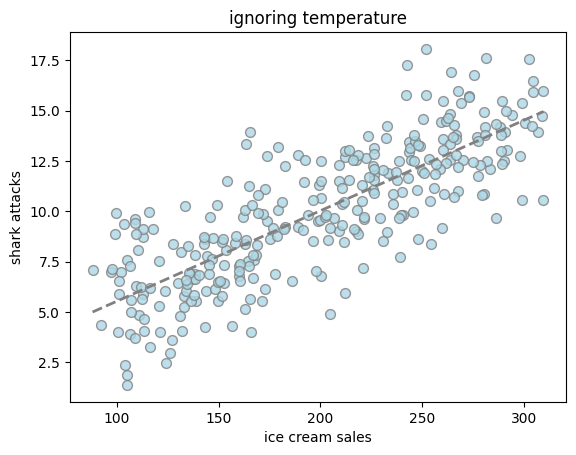

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from plot_style import line_params, scatter_params

# Set seed for reproducibility
np.random.seed(42)

# Simulate data
n = 300
# Confounder: Temperature
temp = np.random.uniform(10, 30, size=n)  # Temperature in degrees Celsius
# Ice cream sales depend on temperature
ice_sales = 10 * temp + np.random.normal(0, 10, size=n)
# Shark attacks depend on temperature but not on ice cream sales directly
shark_attacks = 0.5 * temp + np.random.normal(0, 2, size=n)

# Put into DataFrame
df = pd.DataFrame({
    'temp': temp,
    'ice_sales': ice_sales,
    'shark_attacks': shark_attacks
})

# 1. Naive correlation between ice cream sales and shark attacks
corr = df['ice_sales'].corr(df['shark_attacks'])
print(f"Correlation between ice cream sales and shark attacks: {corr:.3f}")

# 2. Naive regression: shark_attacks ~ ice_sales
X1 = sm.add_constant(df['ice_sales'])
model1 = sm.OLS(df['shark_attacks'], X1).fit()
print("\nNaive regression (shark_attacks ~ ice_sales):")
print(model1.summary())

# 3. Regression controlling for temperature: shark_attacks ~ ice_sales + temp
X2 = sm.add_constant(df[['ice_sales', 'temp']])
model2 = sm.OLS(df['shark_attacks'], X2).fit()
print("\nRegression controlling for temperature (shark_attacks ~ ice_sales + temp):")
print(model2.summary())


# 4. Scatter plot: ice_sales vs. shark_attacks with naive regression line
plt.figure()
plt.scatter(df['ice_sales'], df['shark_attacks'], **scatter_params)
x_vals = np.linspace(df['ice_sales'].min(), df['ice_sales'].max(), 100)
y_vals = model1.params['const'] + model1.params['ice_sales'] * x_vals
plt.plot(x_vals, y_vals, **line_params)
plt.xlabel('ice cream sales')
plt.ylabel('shark attacks')
plt.title('ignoring temperature')
plt.show()

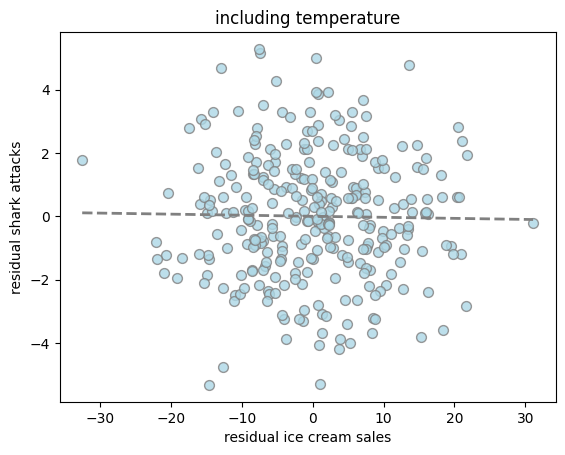


Partial regression summary (residual shark_attacks ~ residual ice_sales):
                            OLS Regression Results                            
Dep. Variable:              res_shark   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.08246
Date:                Fri, 27 Jun 2025   Prob (F-statistic):              0.774
Time:                        19:10:10   Log-Likelihood:                -628.71
No. Observations:                 300   AIC:                             1261.
Df Residuals:                     298   BIC:                             1269.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

In [5]:


# 5. Partial regression plot: residuals after removing temperature effect
res_ice = pd.Series(sm.OLS(df['ice_sales'], sm.add_constant(df['temp'])).fit().resid, name='res_ice')
res_shark = pd.Series(sm.OLS(df['shark_attacks'], sm.add_constant(df['temp'])).fit().resid, name='res_shark')
res_df = pd.DataFrame({'res_ice': res_ice, 'res_shark': res_shark})

plt.figure()
plt.scatter(res_df['res_ice'], res_df['res_shark'], **scatter_params)
# Fit regression on residuals
partial_model = sm.OLS(res_df['res_shark'], sm.add_constant(res_df['res_ice'])).fit()
x_vals2 = np.linspace(res_df['res_ice'].min(), res_df['res_ice'].max(), 100)
y_vals2 = partial_model.params['const'] + partial_model.params['res_ice'] * x_vals2
plt.plot(x_vals2, y_vals2, **line_params)
plt.xlabel('residual ice cream sales')
plt.ylabel('residual shark attacks')
plt.title('including temperature')
plt.show()

print("\nPartial regression summary (residual shark_attacks ~ residual ice_sales):")
print(partial_model.summary())